<a href="https://colab.research.google.com/github/KevOdhiambo/Customer-Analysis/blob/main/Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition

#### 1. Understanding the context
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.


#### 2. Specifying Analysis Question
Perform cluster analysis on customer behaviour data collected by Kira Plastinina, a russian brand to help the sales team identify characteristics of customer groups.

#### 3. Metrics of success
Specification of distinct customer groups and their distinctive characteristics.

#### 4. Recording the experimental design
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Follow up Questions


In [1]:
%load_ext rpy2.ipython

In [4]:
%%R
install.packages("DataExplorer")
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")
install.packages("corrplot")
install.packages("factoextra")
install.packages("caret")
install.packages('tidyr')
install.packages('dplyr')
install.packages('devtools')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)















































































	‘/tmp/RtmpUocemm/downloaded_packages’



In [45]:
%%R
library(devtools)
install_github("vqv/ggbiplot", force = TRUE)
install.packages('BBmisc')

These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                           
2: CRAN packages only            
3: None                          
4: pillar (1.7.0 -> 1.8.0) [CRAN]
5: tibble (3.1.7 -> 3.1.8) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 1
pillar (1.7.0 -> 1.8.0) [CRAN]
tibble (3.1.7 -> 3.1.8) [CRAN]



(as ‘lib’ is unspecified)












	‘/tmp/RtmpUocemm/downloaded_packages’



* checking for file ‘/tmp/RtmpUocemm/remotes3b4cb0e692/vqv-ggbiplot-7325e88/DESCRIPTION’ ... OK
* preparing ‘ggbiplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ggbiplot_0.55.tar.gz’



(as ‘lib’ is unspecified)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’



In [6]:
%%R
#Install necessary libraries
library(readr)
library(tidyverse)
library(psych)
library(caret)
library(readr)
library(corrplot)
library(BBmisc)
library(devtools)
library(tidyr)
library(dplyr)


Attaching package: ‘caret’



    lift


Attaching package: ‘BBmisc’



    coalesce, collapse



    isFALSE





In [46]:
%%R


install.packages('RColorBrewer')
install.packages('magrittr')
install.packages('ggplot2')
install.packages('lattice')


library(magrittr)
library(warn = -1)

library(RColorBrewer)
library(ggplot2)
library(lattice)

library(DataExplorer)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’



In [8]:
#Load data and preview data
%%R
df <- read_csv("EcommerceCustomers.csv")

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
#preview first five entries in our data
%%R
head(df)

# A tibble: 6 × 18
  Administrative Administrative_D… Informational Informational_D… ProductRelated
           <dbl>             <dbl>         <dbl>            <dbl>          <dbl>
1              0                 0             0                0              1
2              0                 0             0                0              2
3              0                -1             0               -1              1
4              0                 0             0                0              2
5              0                 0             0                0             10
6              0                 0             0                0             19
# … with 13 more variables: ProductRelated_Duration <dbl>, BounceRates <dbl>,
#   ExitRates <dbl>, PageValues <dbl>, SpecialDay <dbl>, Month <chr>,
#   OperatingSystems <dbl>, Browser <dbl>, Region <dbl>, TrafficType <dbl>,
#   VisitorType <chr>, Weekend <lgl>, Revenue <lgl>


In [10]:
#preview last five entries from the dataset
%%R
tail(df)

# A tibble: 6 × 18
  Administrative Administrative_D… Informational Informational_D… ProductRelated
           <dbl>             <dbl>         <dbl>            <dbl>          <dbl>
1              0                 0             1                0             16
2              3               145             0                0             53
3              0                 0             0                0              5
4              0                 0             0                0              6
5              4                75             0                0             15
6              0                 0             0                0              3
# … with 13 more variables: ProductRelated_Duration <dbl>, BounceRates <dbl>,
#   ExitRates <dbl>, PageValues <dbl>, SpecialDay <dbl>, Month <chr>,
#   OperatingSystems <dbl>, Browser <dbl>, Region <dbl>, TrafficType <dbl>,
#   VisitorType <chr>, Weekend <lgl>, Revenue <lgl>


In [11]:
#get a glimbse of the dataset entries and columns
%%R
glimpse(df)

#the dataset has 12,330 rows and 18 columns.
#some columns have cateorical values eg the month and Visitor type

Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2…
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, 2…
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05000…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14000…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, 0…
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Feb…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1…
$ Browser      

In [12]:
#Data Cleaning and Check for Anomalies
%%R

#check for missing values
colSums(is.na(df))

#some columns have null values from the dataset

         Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0 


In [13]:
#dealing with Missing Values
%%R
#i'll fill the missing values using the right value. in this case, i'm lookin at the means.


df  = df %>%
  
  mutate(Administrative =replace(Administrative,is.na(Administrative),mean(Administrative,na.rm=TRUE)))%>%
  mutate(Administrative_Duration =replace(Administrative_Duration,is.na(Administrative_Duration),mean(Administrative_Duration,na.rm=TRUE)))%>%
  mutate(Informational = replace(Informational, is.na(Informational), mean(Informational, na.rm = TRUE)))%>%
  mutate(Informational_Duration =replace(Informational_Duration,is.na(Informational_Duration),mean(Informational_Duration,na.rm=TRUE)))%>%
  mutate(ProductRelated =replace(ProductRelated,is.na(ProductRelated),mean(ProductRelated,na.rm=TRUE)))%>%
  mutate(ProductRelated_Duration = replace(ProductRelated_Duration, is.na(ProductRelated_Duration), mean(ProductRelated_Duration, na.rm = TRUE)))%>%
  mutate(BounceRates =replace(BounceRates, is.na(BounceRates),mean(BounceRates,na.rm=TRUE)))%>%
  mutate(ExitRates = replace(ExitRates, is.na(ExitRates), mean(ExitRates, na.rm = TRUE)))

In [14]:
#confirm there are no mising values in te columns
%%R
colSums(is.na(df))

         Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0 


In [15]:
#check for duplicates in the dataset
%%R
anyDuplicated(df)
 #159 entires are duplicated and in this case i'll drop any row with duplicate values.

[1] 159


In [16]:
#drop duplicated values in rows
%%R
df <- df[!duplicated(df), ]

In [17]:
#confirm for any duplicates
%%R
anyDuplicated(df)

#there are no duplicates.

[1] 0


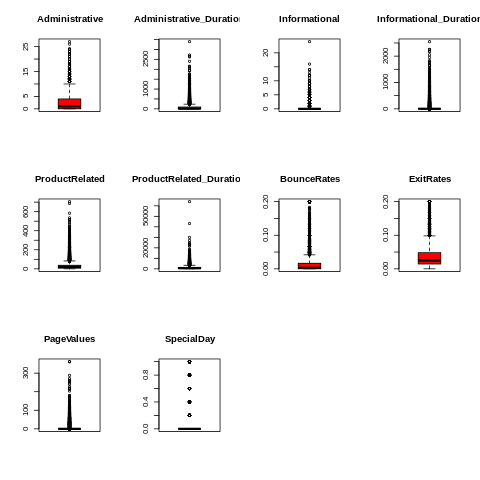

In [18]:
#check for outliers in our dataset using boxplot
%%R
#we start with the numerical variables
par(mfrow=c(3,4))
for(i in 1:10) {
  boxplot(df[,i], main=names(df)[i], col = "red")}

#there are outliers in the variables checked, howver every customer has a different ehaviour, as such i wont remove any.

In [19]:
#check out unique entries in the caetogirical columns
#months
%%R
unique(df$Month)


 [1] "Feb"  "Mar"  "May"  "Oct"  "June" "Jul"  "Aug"  "Nov"  "Sep"  "Dec" 


In [21]:
%%R
#OperatingSystems
unique(df$OperatingSystems)


[1] 1 2 4 3 7 6 8 5


In [22]:
%%R
#Browser
unique(df$Browser)


 [1]  1  2  3  4  5  6  7 10  8  9 12 13 11


In [23]:
%%R
#Region
unique(df$Region)


[1] 1 9 2 3 4 5 6 7 8


In [24]:
%%R
#TRafficType
unique(df$TrafficType)


 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20


In [25]:
%%R
#VisitorType
unique(df$VisitorType)


[1] "Returning_Visitor" "New_Visitor"       "Other"            


In [26]:
%%R
#Weekend
unique(df$Weekend)


[1] FALSE  TRUE


In [27]:
%%R
#REvene
unique(df$Revenue)

[1] FALSE  TRUE


In [28]:
#from previewing our data earlier, we saw that there are some -1 entries which doesnt make sence as such i'll treat them as data anomality
%%R
dfanomaly <- df %>% select(c(Administrative_Duration, Administrative, Informational_Duration, Informational, ProductRelated_Duration, ProductRelated)) %>% filter(Administrative_Duration == -1 | Informational_Duration == -1 | ProductRelated_Duration == -1)
dfanomaly

#there are 33 rows with anomalies

# A tibble: 33 × 6
   Administrative_Duration Administrative Informational_Duration Informational
                     <dbl>          <dbl>                  <dbl>         <dbl>
 1                      -1              0                     -1             0
 2                      -1              0                     -1             0
 3                      -1              1                     -1             0
 4                      -1              0                     -1             0
 5                      -1              0                     -1             0
 6                      -1              0                     -1             0
 7                      -1              0                     -1             0
 8                      -1              0                     -1             0
 9                      -1              0                     -1             0
10                      -1              0                     -1             0
# … with 23 more rows, and 2 more

In [29]:
#drop rows with anomalies
%%R
df <- df %>% filter(Administrative_Duration != -1, Informational_Duration != -1, ProductRelated_Duration != 1)

In [30]:
#Exploratory Data Analysis
%%R

#Univariate Analysis

#Measures of central tendency for the numerical variables
#get summaries of our dataset
describe(df[, c(1:10)])

#all the numerical variables are positively skewed and have high kurtosis values with Informational_Duration, ProductRelated_Duration and PageValues being the most heavily skewed. 

                        vars     n    mean      sd median trimmed    mad min
Administrative             1 12176    2.35    3.33   1.00    1.66   1.48   0
Administrative_Duration    2 12176   81.92  177.64  10.00   43.10  14.83   0
Informational              3 12176    0.51    1.28   0.00    0.18   0.00   0
Informational_Duration     4 12176   34.94  141.58   0.00    3.79   0.00   0
ProductRelated             5 12176   32.15   44.61  18.00   23.14  19.27   0
ProductRelated_Duration    6 12176 1210.97 1920.64 614.85  835.90 749.85   0
BounceRates                7 12176    0.02    0.04   0.00    0.01   0.00   0
ExitRates                  8 12176    0.04    0.05   0.03    0.03   0.02   0
PageValues                 9 12176    5.96   18.67   0.00    1.34   0.00   0
SpecialDay                10 12176    0.06    0.20   0.00    0.00   0.00   0
                             max    range skew kurtosis    se
Administrative             27.00    27.00 1.94     4.63  0.03
Administrative_Duration  3398

In [31]:
#get frequency ditribution table for the categorical variables
%%R
sapply(df[, c(10:18)], table)

#from the frequency table, the following are the key points: 

#Months with the highest traffic are May, November, March and December.
# Most visitors have a type 2 operating system.
# Most visitors have a type 2 browser.
# Most visitors to the site are located in region 1
# Most of the traffic to the website is of type 2 and 1
# Visitors to the site are mostly returning visitors.
# Most visits to the site do not earn revenue

$SpecialDay

    0   0.2   0.4   0.6   0.8     1 
10930   178   242   348   324   154 

$Month

 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1706  169  431  285 1853 3322 2980  549  448 

$OperatingSystems

   1    2    3    4    5    6    7    8 
2542 6525 2526  476    6   19    7   75 

$Browser

   1    2    3    4    5    6    7    8    9   10   11   12   13 
2421 7867  104  728  464  174   49  134    1  162    6   10   56 

$Region

   1    2    3    4    5    6    7    8    9 
4705 1124 2375 1167  316  801  755  431  502 

$TrafficType

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2380 3907 2003 1064  259  440   40  343   41  450  247    1  728   13   37    3 
  17   18   19   20 
   1   10   17  192 

$VisitorType

      New_Visitor             Other Returning_Visitor 
             1693                81             10402 

$Weekend

FALSE  TRUE 
 9320  2856 

$Revenue

FALSE  TRUE 
10268  1908 



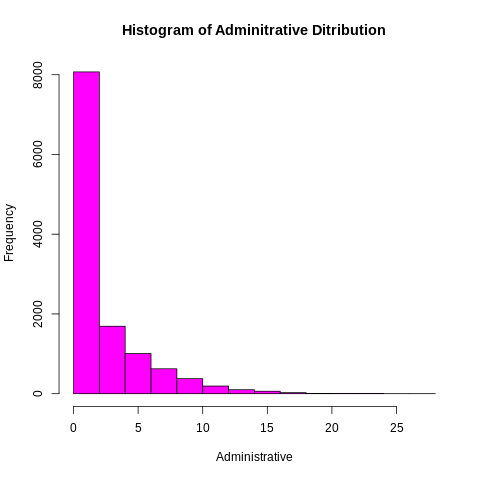

In [32]:
#Get graphical presentations showcasing the distributions or the numerical variables.
%%R
#1. Admnistrative
hist(df$Administrative,
     main = "Histogram of Adminitrative Ditribution",
     xlab = "Administrative",
     col = "magenta")

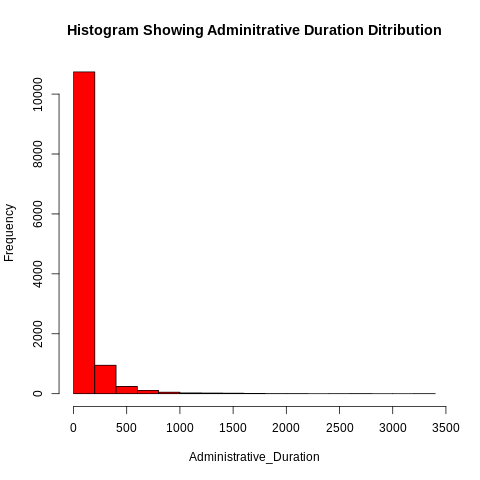

In [33]:
#2. Administrative_Duration
%%R
hist(df$Administrative_Duration,
     main = "Histogram Showing Adminitrative Duration Ditribution",
     xlab = "Administrative_Duration",
     col = "red")


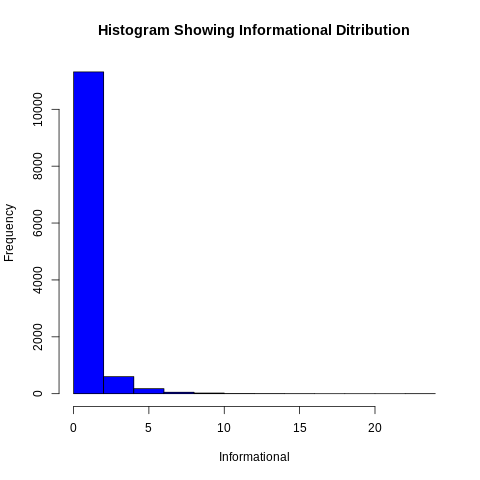

In [34]:
#3. Informartional
%%R
hist(df$Informational,
     main = "Histogram Showing Informational Ditribution",
     xlab = "Informational",
     col = "blue")

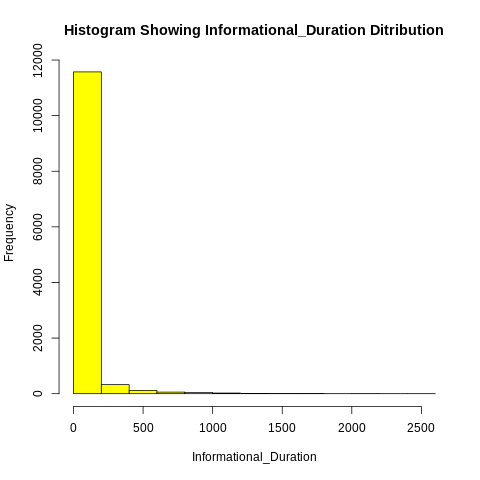

In [35]:
#4. Informational_Duration
%%R
hist(df$Informational_Duration,
     main = "Histogram Showing Informational_Duration Ditribution",
     xlab = "Informational_Duration",
     col = "yellow")

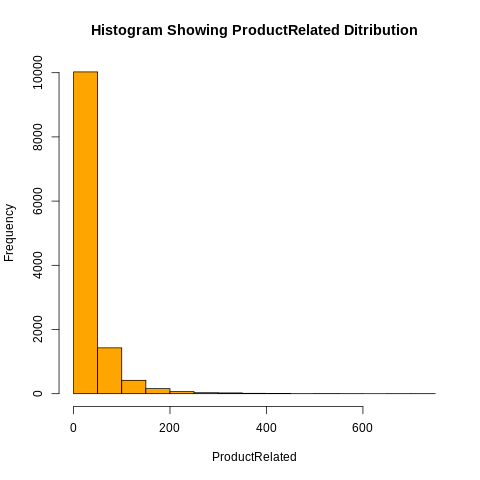

In [36]:
#5. Product Related
%%R
hist(df$ProductRelated,
     main = "Histogram Showing ProductRelated Ditribution",
     xlab = "ProductRelated",
     col = "orange")

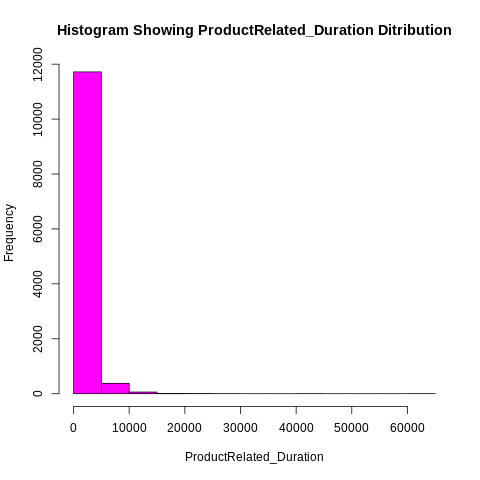

In [37]:
#6. ProductRelated_Duration
%%R
hist(df$ProductRelated_Duration,
     main = "Histogram Showing ProductRelated_Duration Ditribution",
     xlab = "ProductRelated_Duration",
     col = "magenta")

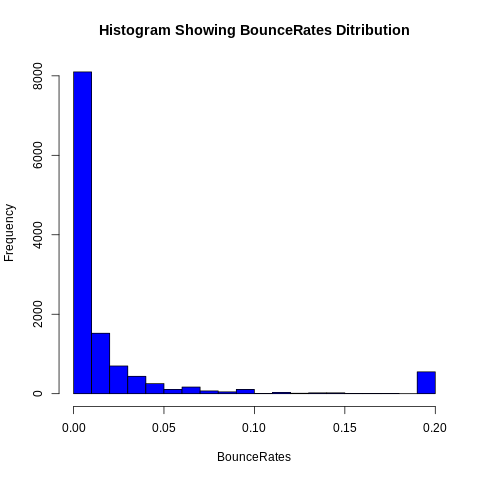

In [38]:
#7. BounceRates
%%R
hist(df$BounceRates,
     main = "Histogram Showing BounceRates Ditribution",
     xlab = "BounceRates",
     col = "blue")

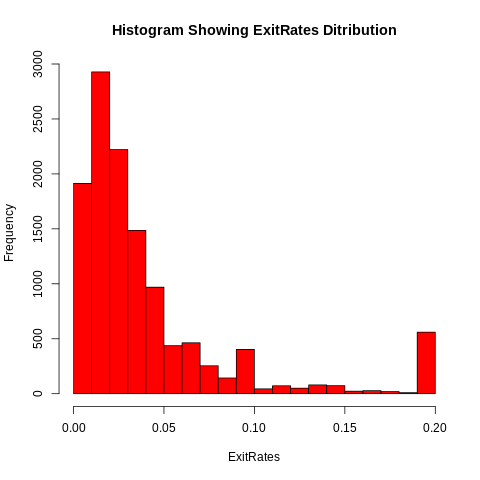

In [39]:
#8. ExitRates
%%R
hist(df$ExitRates,
     main = "Histogram Showing ExitRates Ditribution",
     xlab = "ExitRates",
     col = "red")

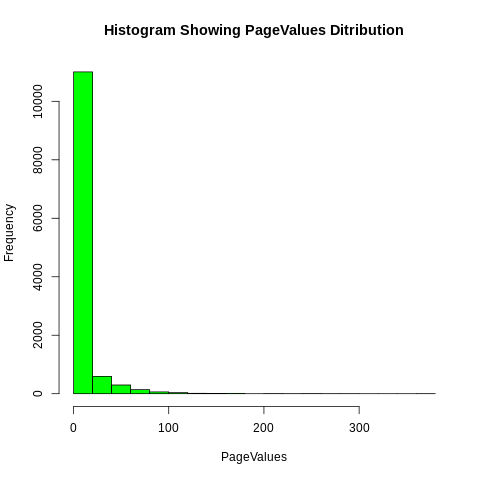

In [40]:
#9. PageValues
%%R
hist(df$PageValues,
     main = "Histogram Showing PageValues Ditribution",
     xlab = "PageValues",
     col = "green")

#From all the distriution we can tell that all the nuemrical varables are Highly positively skewed.

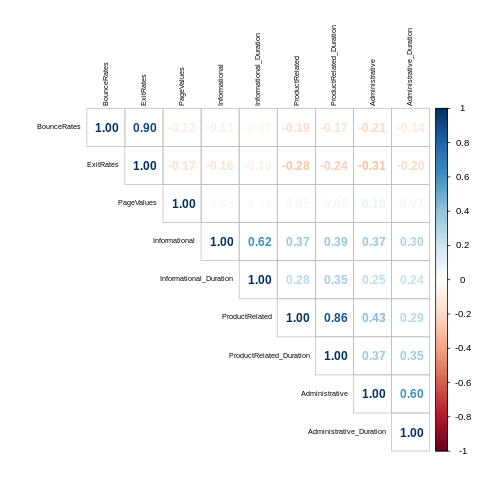

In [41]:
#**Bivariate Analysis**
%%R
#plot showing te correlation between values
corrplot(corr = cor(df[, c(1:9)]), method = "number", type = "upper", order = "hclust", tl.col = "black", tl.cex = 0.6)
#there is a high correlation between bounce rates and exit rates.

In [54]:
%%R
df2 <- df[, 10:16]
##
glimpse(df2)

Rows: 12,176
Columns: 7
$ SpecialDay       <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.4, 0.0, 0.4, 0.0, 0.0…
$ Month            <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Feb…
$ OperatingSystems <dbl> 1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 3,…
$ Browser          <dbl> 1, 2, 2, 3, 2, 2, 4, 1, 1, 1, 5, 2, 1, 1, 2, 4, 2, 2,…
$ Region           <dbl> 1, 1, 2, 1, 1, 2, 1, 3, 4, 1, 1, 3, 9, 1, 1, 4, 5, 1,…
$ TrafficType      <dbl> 1, 2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 4, 1, 5,…
$ VisitorType      <chr> "Returning_Visitor", "Returning_Visitor", "Returning_…


In [58]:
%%R

#first we have to encode the Categorical features
# One hot encode categorical features


df2 <- df[, 10:16]
dmy <- dummyVars("~ SpecialDay + Month + OperatingSystems + Browser + Region + TrafficType + VisitorType", data= df2)
ohe <- data.frame(predict(dmy, newdata = df2))
model_data <- cbind(df[ , 1:9], ohe)
model_data$Weekend <- as.numeric(df$Weekend)


In [56]:
# Checking the data types of  our new attribute
%%R
sapply(model_data, class)

              Administrative      Administrative_Duration 
                   "numeric"                    "numeric" 
               Informational       Informational_Duration 
                   "numeric"                    "numeric" 
              ProductRelated      ProductRelated_Duration 
                   "numeric"                    "numeric" 
                 BounceRates                    ExitRates 
                   "numeric"                    "numeric" 
                  PageValues                   SpecialDay 
                   "numeric"                    "numeric" 
                    MonthAug                     MonthDec 
                   "numeric"                    "numeric" 
                    MonthFeb                     MonthJul 
                   "numeric"                    "numeric" 
                   MonthJune                     MonthMar 
                   "numeric"                    "numeric" 
                    MonthMay                     MonthNo

In [57]:
#preview our new data
%%R
head(model_data)

  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                       0             0                      0
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              2                2.666667  0.05000000 0.1400000          0
4             10              627.500000  0.02000000 0.0500000          0
5             19              154.216667  0.01578947 0.0245614          0
6         

In [59]:
# Normalize continuous variables
%%R
model_data[, 1:9] <- normalize(model_data[, 1:9], method = "range")

In [60]:
#check the summary after normalization
%%R
summary(model_data)

 Administrative    Administrative_Duration Informational    
 Min.   :0.00000   Min.   :0.000000        Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.000000        1st Qu.:0.00000  
 Median :0.03704   Median :0.002942        Median :0.00000  
 Mean   :0.08691   Mean   :0.024103        Mean   :0.02126  
 3rd Qu.:0.14815   3rd Qu.:0.027952        3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.000000        Max.   :1.00000  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :0.00000        Min.   :0.00000   Min.   :0.000000       
 1st Qu.:0.00000        1st Qu.:0.01135   1st Qu.:0.003079       
 Median :0.00000        Median :0.02553   Median :0.009611       
 Mean   :0.01371        Mean   :0.04560   Mean   :0.018929       
 3rd Qu.:0.00000        3rd Qu.:0.05390   3rd Qu.:0.023153       
 Max.   :1.00000        Max.   :1.00000   Max.   :1.000000       
  BounceRates        ExitRates        PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.0000   Min

In [74]:
%%R
#Install necessary libraries
install.packages('NbClust')

#call the necessary libraries
library(cluster)
library(NbClust)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpUocemm/downloaded_packages’



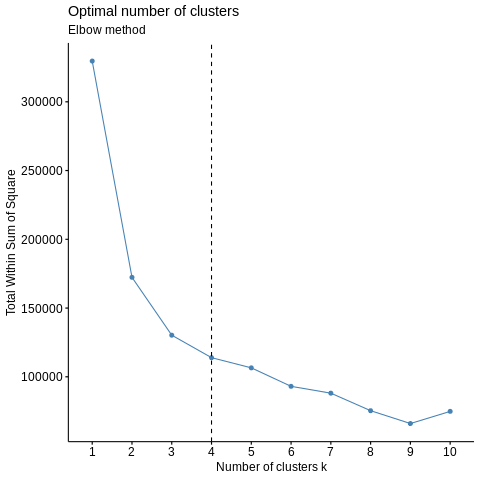

In [75]:
#K-Mean
# Searching for the optimal number of clusters
%%R
fviz_nbclust(model_data, kmeans, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")


In [76]:
%%R
# Perform kmean clustering with 5 clusters
customers <- kmeans(model_data, centers = 5, nstart = 25) 
str(customers)

List of 9
 $ cluster     : Named int [1:12176] 3 3 3 3 3 3 3 3 5 3 ...
  ..- attr(*, "names")= chr [1:12176] "1" "2" "3" "4" ...
 $ centers     : num [1:5, 1:28] 0.0795 0.0747 0.0902 0.0793 0.0882 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:28] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ totss       : num 329623
 $ withinss    : num [1:5] 11117 9369 29445 23894 24061
 $ tot.withinss: num 97887
 $ betweenss   : num 231737
 $ size        : int [1:5] 970 222 6054 1856 3074
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [77]:
# Size of each cluster
%%R
customers$size

#The first cluster has the most components

[1]  970  222 6054 1856 3074


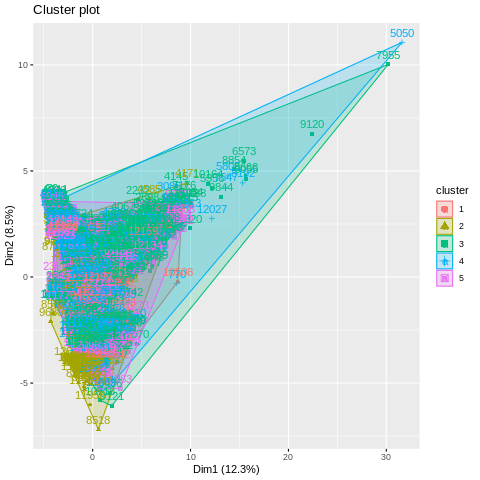

In [68]:
# Visualizing the  clusters
%%R
fviz_cluster(customers, data = model_data)

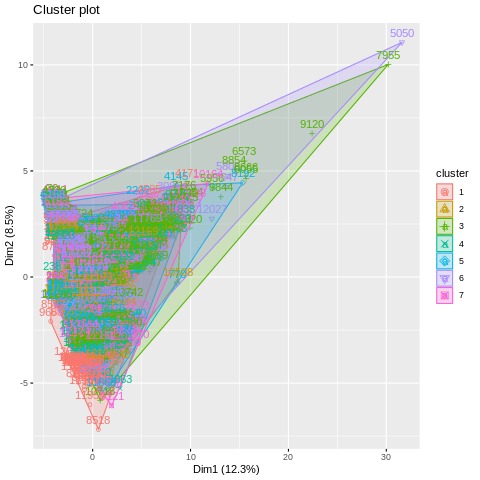

In [69]:
%%R
# The visualization shows the data is better fitted to 7 clusters

customers <- kmeans(model_data, centers = 7, nstart = 25)
customers$size


fviz_cluster(customers, data = model_data)

#After dimension reduction using PCA, the data has been separated into 7 distinct clusters.

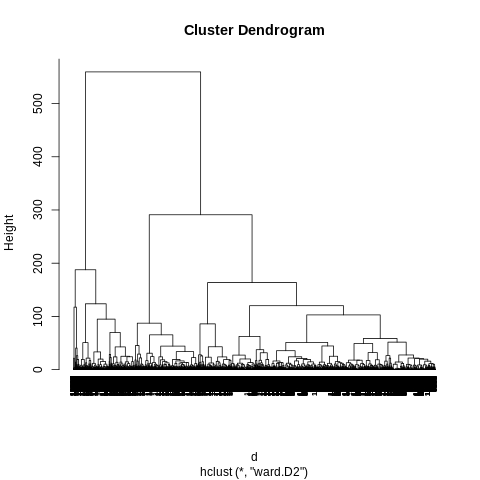

In [78]:
### Hierachical Clustering
%%R
# d will be the first argument in the hclust() dissimilairty matrix
# 

d <- dist(model_data, method = "euclidean")

# apply hierarchical clustering using the Ward's method

res.hc <- hclust(d, method = "ward.D2")

# Lastly we plot the obtained dendrogram

plot(res.hc, cex = 0.6, hang = -1)

In [79]:
### Cluster Analysis
%%R

df <-  df %>% mutate(group = customers$cluster)
head(df)

# A tibble: 6 × 19
  Administrative Administrative_D… Informational Informational_D… ProductRelated
           <dbl>             <dbl>         <dbl>            <dbl>          <dbl>
1              0                 0             0                0              1
2              0                 0             0                0              2
3              0                 0             0                0              2
4              0                 0             0                0             10
5              0                 0             0                0             19
6              0                 0             0                0              2
# … with 14 more variables: ProductRelated_Duration <dbl>, BounceRates <dbl>,
#   ExitRates <dbl>, PageValues <dbl>, SpecialDay <dbl>, Month <chr>,
#   OperatingSystems <dbl>, Browser <dbl>, Region <dbl>, TrafficType <dbl>,
#   VisitorType <chr>, Weekend <lgl>, Revenue <lgl>, group <int>


In [80]:
# Describe numerical variables
%%R
summary_stats <- df %>% group_by(group)%>% select(Administrative:PageValues, group)%>% summarise_all(mean)
summary_stats


# A tibble: 5 × 10
  group Administrative Administrative_Duration Informational Informational_Dura…
  <int>          <dbl>                   <dbl>         <dbl>               <dbl>
1     1           2.15                    73.1         0.402                31.7
2     2           2.02                    78.1         0.311                30.7
3     3           2.44                    84.3         0.556                38.3
4     4           2.14                    78.3         0.444                29.0
5     5           2.38                    82.4         0.508                33.2
# … with 5 more variables: ProductRelated <dbl>, ProductRelated_Duration <dbl>,
#   BounceRates <dbl>, ExitRates <dbl>, PageValues <dbl>


#Conclusion/Recommendations

K Means clustering was difficult to implement. Hierarchial Clustering was ait easier however, it gives a low accuracy.

